# Pre-reading exercises answers. 



Here, we give some example answers to the exercises provided in the pre-reading. 

For each question, we give you one __POSSIBLE__ set of answers. There are plenty of other methods or arguments that could also be used to reach similar conclusions. Maybe you came up with one of those different paths, great!

Also, we provide with a more detailed and thorough answers than might be expected if you were solving these problems in practice. This is only to cover the possible questions you have when solving these exercises.

In [2]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt

## Question 1
__Suppose  you  have  10  apples  on  a  tree.   Each  of them  falls  off  after  an  exponentially  distributed amount of time, with mean 10 days.  How long (on average) until the first apple falls from the tree? What is the expected time until all 10 apples fall from the tree? Can you calculate this analytically? Can you simulate this apple tree?__

Let's solve it analytically:

(a) How long to the frist apple:

Each apple takes 10 days on average to fall, hence the `rate` of apple dropping is 1/10 per apple.
Now, the time until the first apple falls is equivalent to the minimum of 10 exponential random variables. The minimum of multiple exponential distributions is an exponential distribution with rate equal to the sum of individual rates.
Hence:
$$\lambda_{min}= \frac{1}{10}+\frac{1}{10}+...\frac{1}{10}=\frac{10}{10}=1$$
The mean time until first apple is thus $$1/\lambda_{min}=1 \text{ day}.$$ This matches the following simulations.

(b) Mean time to all of them dropped:

In order to determine this, let's first  first consider `how long until the SECOND apple drops?`. After the first apple drops, there are nine apples remaining, and using the memoryless of the exponential distribution, we still have 9 exponential random variables with the same rate. And applying the same idea as part (a), the falling time of the next apple to fall (after the first one has fallen) is an exponential random variable with rate 9/10 apples per day. Thus, the expected time between the first and second falling apples is 10/9 days.

The total time for two apples to drop is hence $1 + 10/9$ days.

Similar working can be used to determine the time until the 3rd, 4th etc apples drop, with the rate of apples falling steadily decreasing.

This leads to:
$$ \lambda_{10->9}= \frac{10}{10} ,\quad  \lambda_{9->8}= \frac{9}{10},\quad \lambda_{8->7}= \frac{8}{10} ,...\quad,\lambda_{1->0}= \frac{1}{10}.$$

$$ E(T_{10->9})= \frac{10}{10} ,\quad  E(T_{9->8})= \frac{10}{9},\quad  E(T_{8->7})= \frac{10}{9} ,...\quad,E(T_{1->0})= \frac{10}{1}.$$

$$ E(T_{10->0})= \sum \left[\frac{10}{10}+\frac{10}{9}+\frac{10}{8}+...+\frac{10}{1} \right] \approx 29.2897.$$

Hence, the expected time for all apples to drop is roughly 29.3days. This matches the observed results from the following simulations.


In [4]:
## Simulation answer

##Step 1: simulate a large number of apples.

AverageFallTime = 10
numApples = 10
numSamples =10000
Samples = random.exponential(AverageFallTime,[numSamples,numApples])

FirstApple = Samples.min(axis=1)
LastApple = Samples.max(axis=1)

AverageFirstApple = np.mean(FirstApple)
AverageLastApple = np.mean(LastApple)

print("Mean first apple:",AverageFirstApple)
print("Mean last apple:",AverageLastApple)

Mean first apple: 1.0026416413353243
Mean last apple: 29.224850885701336



## Question 2: 

__When  talking  about  Markov  chains,  we  use  the example of a simple weather model as a Markov chain.   Do  you  believe  weather  in  the  real  worldcan  be  modeled  using  a  Markov  chain?   Why/why not?__



In the pre-reading, we gave weather systems as examples of continuous time Markov chain with discrete states.
This inevitably leads to the question if this is a GOOD model of the weather... and the answer is... it depends. And actually that is the answer in most of our models.

If you are planning predict the weather across an entire year, then naturally the cycles of summer and winter, wet season and dry are going to have a significant impact on how the weather behaves at any given time: the system is NOT memoryless, because it remembers that it has been 6 weeks since the height of summer. In this case, it is clear that we do not satisfy the Markov property, and this is not a good model. And in fact, in reality, the weather cast models are really complex.

On a day by day basis, the time of day is going to effect the weather: in some places you can set your clock by when to expect the afternoon rains, while in others rain and sunshine might flip flop back and forward in a much less predictable manner. Hence, the model applicability also depends on the location of where the weather is being tracked. 

There are other systems for which Markov chains are a much better model. Some of these systems are often much less familiar, and far more technical (examples include signals passing through an internet central router, or chemical reactions).

Remember the saying: "all models are wrong, but some are useful". 

## Question 3:
__Using  your  favorite  programming  language,  program up a for loop that starts at zero, and moves 3 steps up 40% of the time, and 2 steps down 60%. If  you  run  the  loop  1000  times,  how  often  does it reach −5 (or lower) _before_ it reaches +10 (or higher).__

Do you also noticed we give a while loop solution? Hehe, they are equivalent

In [14]:
#Question 3: biased random walks

Samples = 1000  #This is the number of samples.
Wins = 0 # number ot times to reach -5 before +10
sss = 0 # index

while sss < Samples:
    pos = 0 # Initial position
    while (pos > -5) & (pos < 10): # Continue running the simulation as long as we are in bounds.
        if random.rand()<0.4: # Flip a BIASED coin. 40% of the time we go 3 steps up.
            pos = pos + 3
        else:   # The rest of the time we go two steps down.
            pos = pos - 2
    if pos <=-5:
        Wins = Wins + 1 # we have reached -5 BEFORE +10
    sss = sss + 1

print("We hit -5 before +10 in ", Wins," out of ",Samples," simulations" )

We hit -5 before +10 in  663  out of  1000  simulations


## Question 4:
__Using your favorite programming language, write a program that generates a Brownian motion, and reproduce the kind of plot you see in figure 5.4__

Things to notice here:
- Brownian motion is a continous in time process, hence we can only approximate it numerically with discrete steps.
- The position updates proportional to the square root the time update, ie, we multiply the normal step by $\sqrt{\Delta t}$
- Hence, the time step will determine the resolution you have on your brownian motion. 
- We select a small $\Delta t$ to get a good resolution

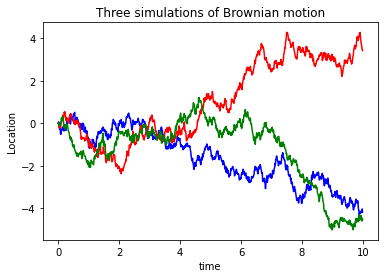

In [16]:
#   Question 4: produce a brownian motion.

NumberOfSteps = 1000

randomNormals = random.randn(NumberOfSteps)
PositionArray = np.zeros(NumberOfSteps)
TimeArray = np.zeros(NumberOfSteps)
dt = 0.01

currentSteps = 1
while currentSteps < NumberOfSteps:
    PositionArray[currentSteps] = PositionArray[currentSteps-1] + (randomNormals[currentSteps])*np.math.sqrt(dt)
    TimeArray[currentSteps] = TimeArray[currentSteps-1] + dt
    currentSteps += 1
# Once you've created a random walk (or other algorithm) you might want to display it
plt.plot(TimeArray, PositionArray, '-b')


# Let's simulate it again:
randomNormals = random.randn(NumberOfSteps)
currentSteps = 1
while currentSteps < NumberOfSteps:
    PositionArray[currentSteps] = PositionArray[currentSteps-1] + (randomNormals[currentSteps]) * np.math.sqrt(dt)
    TimeArray[currentSteps] = TimeArray[currentSteps-1] + dt
    currentSteps += 1
# Plot in red
plt.plot(TimeArray, PositionArray, '-r')

# And one more time:
randomNormals = random.randn(NumberOfSteps)
currentSteps = 1
while currentSteps < NumberOfSteps:
    PositionArray[currentSteps] = PositionArray[currentSteps-1] + (randomNormals[currentSteps]) * np.math.sqrt(dt)
    TimeArray[currentSteps] = TimeArray[currentSteps-1] + dt
    currentSteps += 1

# Plot in gren
plt.plot(TimeArray, PositionArray,'-g')
plt.title('Three simulations of Brownian motion')
plt.ylabel('location')
plt.xlabel('time')
plt.show()